In [2]:
import numpy as np

import pandas as pd

import sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score


import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
import joblib
import pickle

In [6]:
print("numpy:",np.__version__)
print("pandas:",pd.__version__)
print("sklearn:",sklearn.__version__)



numpy: 2.1.0
pandas: 2.2.2
sklearn: 1.5.1


## Display settings

In [4]:
pd.set_option("display.max_columns",None)

In [5]:
sklearn.set_config(transform_output="pandas")

## 3)Getting data

In [6]:
df=pd.read_csv('data/Clean_dataset.csv',index_col=0)

In [7]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [8]:
df=df.drop('flight',axis=1)

In [9]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [10]:
len(df)

300153

In [11]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


## Data preprocessing

In [12]:
num_cols=['duration','days_left']
cat_col=[col for col in df.iloc[:,:-1] if (col not in num_cols)]

In [13]:
cat_col

['airline',
 'source_city',
 'departure_time',
 'stops',
 'arrival_time',
 'destination_city',
 'class']

In [14]:
for col in cat_col:
    print(df[col].unique())

['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
['zero' 'one' 'two_or_more']
['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
['Economy' 'Business']


In [15]:
df1=df

In [16]:
for col in cat_col:
    # Print unique values before mapping
    print(f"Before mapping - {col}: {df1[col].unique()}")
    
    # Create a mapping for the unique non-null values in the column
    unique_values = df1[col].dropna().unique()
    mapping = {name: idx for idx, name in enumerate(unique_values, start=1)}
    
    # Replace the column's values with the corresponding integers
    df1[col] = df1[col].replace(mapping)
    
    # Print unique values after mapping
    print(f"After mapping - {col}: {df1[col].unique()}")
    print()

Before mapping - airline: ['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']


C:\Users\abhi9\AppData\Local\Temp\ipykernel_22064\24196722.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[col] = df1[col].replace(mapping)


After mapping - airline: [1 2 3 4 5 6]

Before mapping - source_city: ['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
After mapping - source_city: [1 2 3 4 5 6]

Before mapping - departure_time: ['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
After mapping - departure_time: [1 2 3 4 5 6]

Before mapping - stops: ['zero' 'one' 'two_or_more']
After mapping - stops: [1 2 3]

Before mapping - arrival_time: ['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
After mapping - arrival_time: [1 2 3 4 5 6]

Before mapping - destination_city: ['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
After mapping - destination_city: [1 2 3 4 5 6]

Before mapping - class: ['Economy' 'Business']
After mapping - class: [1 2]



In [17]:
df1.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,1,1,1,1,1,1,2.17,1,5953
1,1,1,2,1,2,1,1,2.33,1,5953
2,2,1,2,1,3,1,1,2.17,1,5956
3,3,1,3,1,4,1,1,2.25,1,5955
4,3,1,3,1,2,1,1,2.33,1,5955


### 3.1 split data

In [18]:
def split_data(data):
    x=data.iloc[:,:-1]
    y=data.iloc[:,-1:]
    return x,y

In [19]:
train,val,test=np.split(df1.sample(frac=1),[int(0.6*len(df1)),int(0.8*len(df1))])

c:\Users\abhi9\anaconda3\envs\flightenv\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [20]:
x_train,y_train=split_data(train)

In [21]:
x_train.shape

(180091, 9)

In [22]:
type(x_train)

pandas.core.frame.DataFrame

In [23]:
y_train.shape

(180091, 1)

In [24]:
x_val,y_val=split_data(val)

In [25]:
x_test,y_test=split_data(test)

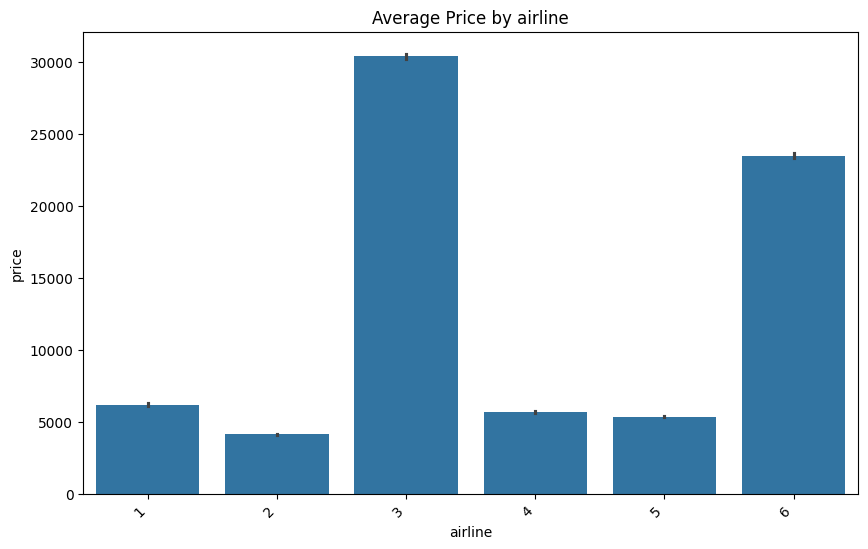

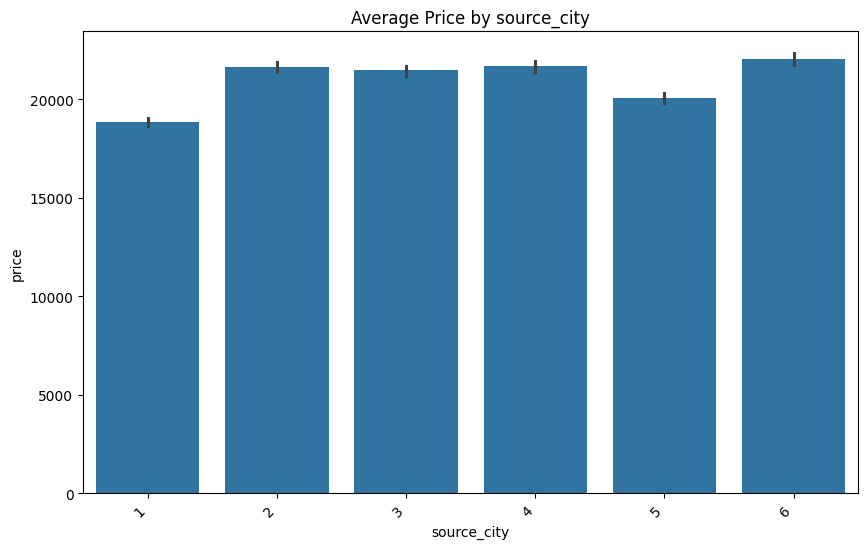

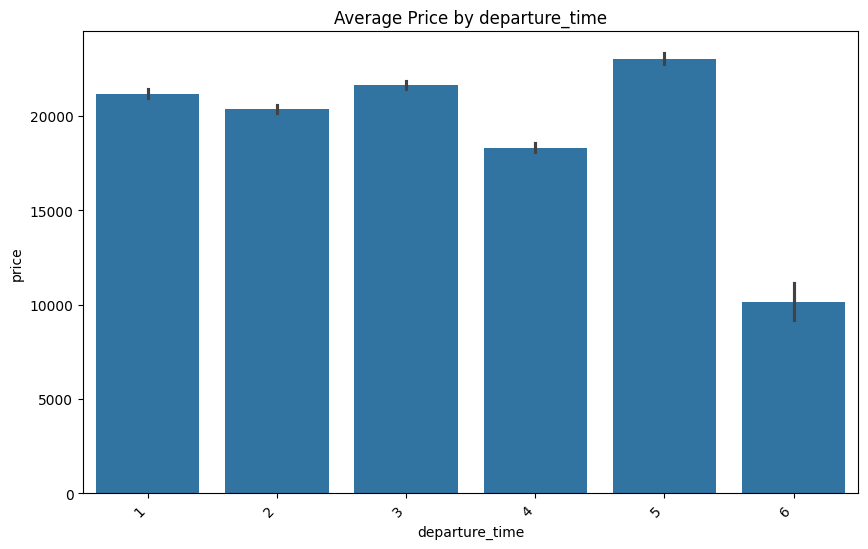

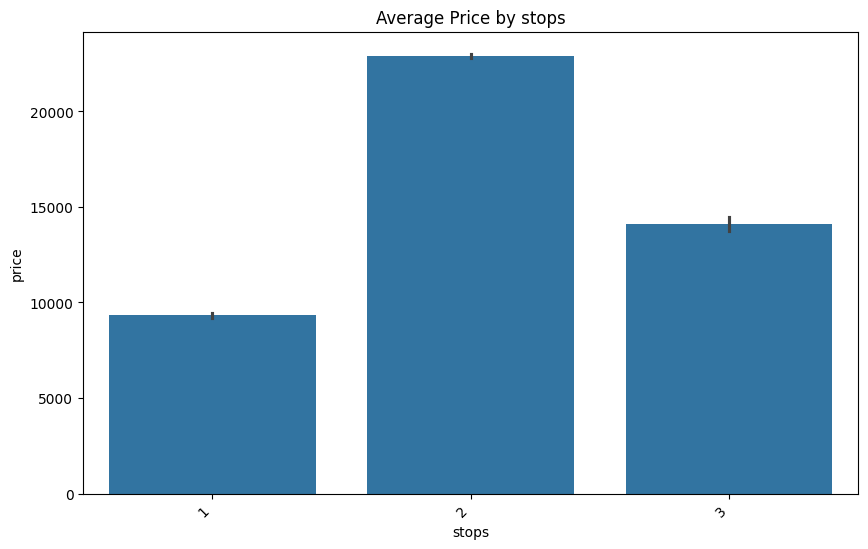

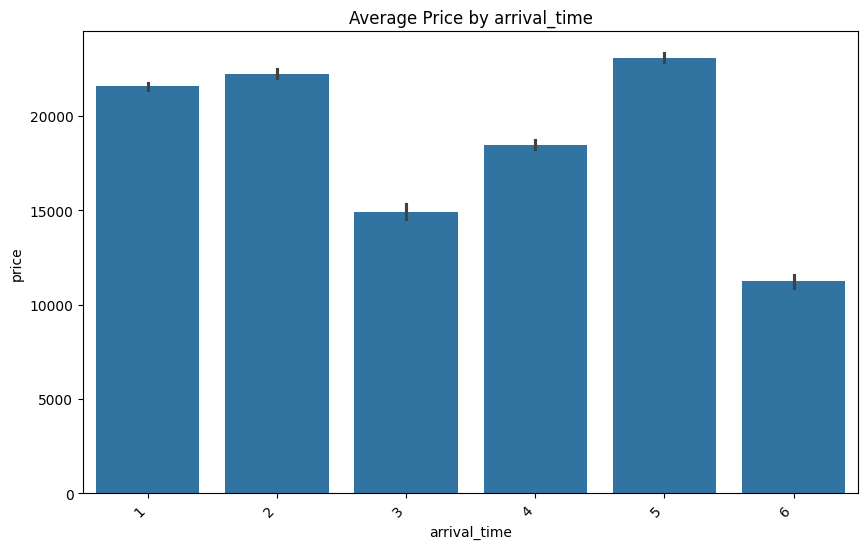

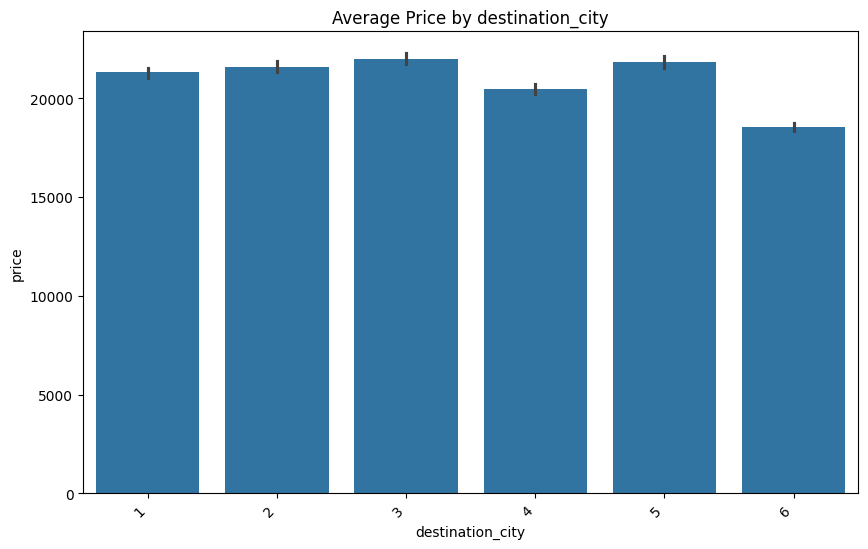

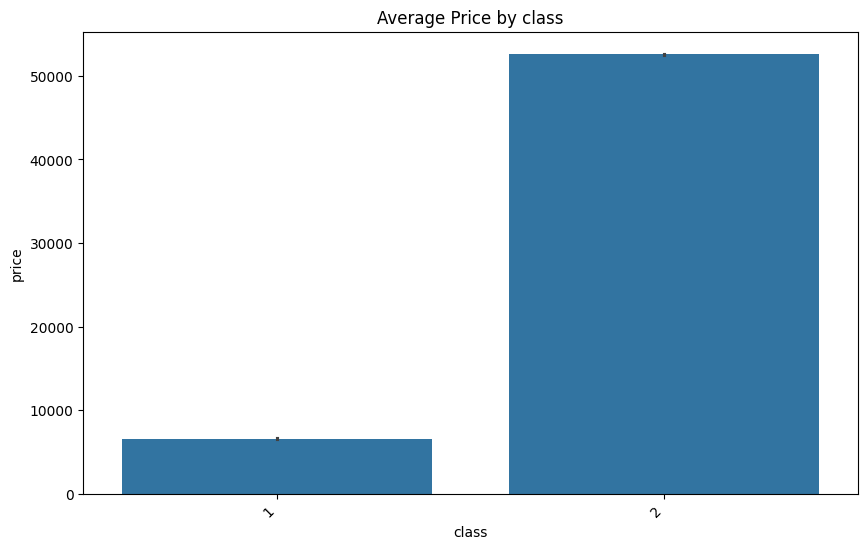

In [26]:
for col in cat_col:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=x_train[col],y=y_train.squeeze())
    plt.title(f'Average Price by {col}')
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Model selection

## linear regression

In [27]:
lr=LinearRegression()

In [28]:
lr.fit(x_train,y_train)


LinearRegression()

In [29]:
y_train_pred=lr.predict(x_train)
y_train_pred

array([[ 4842.99136079],
       [ 4163.53531059],
       [ 3031.35483945],
       ...,
       [ -567.85597276],
       [ 8680.29621764],
       [56201.54055295]])

In [30]:
r2_score(y_train,y_train_pred)

0.9036757231026159

In [31]:
y_train_val=lr.predict(x_val)
r2_score(y_val,y_train_val)

0.9043709652415333

In [32]:
y_test_pred=lr.predict(x_test)
r2_score(y_test,y_test_pred)

0.9024189272814869

## lasso

In [33]:
lasso=Lasso()

In [34]:
lasso.fit(x_train,y_train)

Lasso()

In [35]:
yl_pred=lasso.predict(x_train)
r2_score(y_train,yl_pred)

0.9036756944346552

In [36]:
yl_val=lasso.predict(x_val)
r2_score(y_val,yl_val)

0.9043715088928259

In [37]:
yl_test=lasso.predict(x_test)
r2_score(y_test,yl_test)

0.902418886259417

In [38]:
with open('model.pkl','wb') as file:
    pickle.dump(lr,file)